In [1]:
import numpy as np

In [2]:
data = """
x,120543544,120557811,120815450,121273086,121273087,121273088,120307684,120307701,120307706,101016325,101019900,101016375
120543544,1.000000,0.999456,0.974687,0.692523,0.710209,0.711143,0.889563,0.892534,0.892554,0.677760,0.678882,0.680475
120557811,0.999456,1.000000,0.971201,0.695965,0.714914,0.715918,0.885205,0.888462,0.888449,0.670147,0.671346,0.673363
120815450,0.974687,0.971201,1.000000,0.621746,0.636744,0.637534,0.935750,0.937370,0.937481,0.740463,0.741034,0.741570
121273086,0.692523,0.695965,0.621746,1.000000,0.998741,0.998597,0.327150,0.332770,0.332945,0.000000,0.000000,0.000000
121273087,0.710209,0.714914,0.636744,0.998741,1.000000,0.999996,0.348158,0.354089,0.354215,0.017956,0.018094,0.018733
121273088,0.711143,0.715918,0.637534,0.998597,0.999996,1.000000,0.349304,0.355252,0.355375,0.018956,0.019102,0.019777
120307684,0.889563,0.885205,0.935750,0.327150,0.348158,0.349304,1.000000,0.999949,0.999956,0.894349,0.894627,0.895083
120307701,0.892534,0.888462,0.937370,0.332770,0.354089,0.355252,0.999949,1.000000,0.999999,0.891821,0.892122,0.892691
120307706,0.892554,0.888449,0.937481,0.332945,0.354215,0.355375,0.999956,0.999999,1.000000,0.891855,0.892153,0.892707
101016325,0.677760,0.670147,0.740463,0.000000,0.017956,0.018956,0.894349,0.891821,0.891855,1.000000,0.999974,0.999774
101019900,0.678882,0.671346,0.741034,0.000000,0.018094,0.019102,0.894627,0.892122,0.892153,0.999974,1.000000,0.999875
101016375,0.680475,0.673363,0.741570,0.000000,0.018733,0.019777,0.895083,0.892691,0.892707,0.999774,0.999875,1.000000
"""

In [3]:
# Parse the matrix
lines = data.strip().split('\n')
headers = lines[0].split(',')[1:]
matrix = np.array([line.split(',')[1:] for line in lines[1:]], dtype=float)
matrix

array([[1.      , 0.999456, 0.974687, 0.692523, 0.710209, 0.711143,
        0.889563, 0.892534, 0.892554, 0.67776 , 0.678882, 0.680475],
       [0.999456, 1.      , 0.971201, 0.695965, 0.714914, 0.715918,
        0.885205, 0.888462, 0.888449, 0.670147, 0.671346, 0.673363],
       [0.974687, 0.971201, 1.      , 0.621746, 0.636744, 0.637534,
        0.93575 , 0.93737 , 0.937481, 0.740463, 0.741034, 0.74157 ],
       [0.692523, 0.695965, 0.621746, 1.      , 0.998741, 0.998597,
        0.32715 , 0.33277 , 0.332945, 0.      , 0.      , 0.      ],
       [0.710209, 0.714914, 0.636744, 0.998741, 1.      , 0.999996,
        0.348158, 0.354089, 0.354215, 0.017956, 0.018094, 0.018733],
       [0.711143, 0.715918, 0.637534, 0.998597, 0.999996, 1.      ,
        0.349304, 0.355252, 0.355375, 0.018956, 0.019102, 0.019777],
       [0.889563, 0.885205, 0.93575 , 0.32715 , 0.348158, 0.349304,
        1.      , 0.999949, 0.999956, 0.894349, 0.894627, 0.895083],
       [0.892534, 0.888462, 0.93737 , 0.3

In [4]:
# Ensure the diagonal is ignored for self-comparisons
np.fill_diagonal(matrix, np.nan)

In [5]:
# Find indices of the minimum and maximum non-diagonal values
min_index = np.nanargmin(matrix)
max_index = np.nanargmax(matrix)
min_index, max_index

(45, 92)

In [6]:
# Convert flat index to 2D index
min_pair = np.unravel_index(min_index, matrix.shape)
max_pair = np.unravel_index(max_index, matrix.shape)
min_index, max_index

(45, 92)

In [7]:
# Retrieve min and max values
min_value = matrix[min_pair]
max_value = matrix[max_pair]
min_value, max_value

(0.0, 0.999999)

In [8]:
# Print results
print(f"Most similar pair: ({headers[min_pair[0]]}, {headers[min_pair[1]]}) with a distance of {min_value}")
print(f"Most dissimilar pair: ({headers[max_pair[0]]}, {headers[max_pair[1]]}) with a distance of {max_value}")

Most similar pair: (121273086, 101016325) with a distance of 0.0
Most dissimilar pair: (120307701, 120307706) with a distance of 0.999999


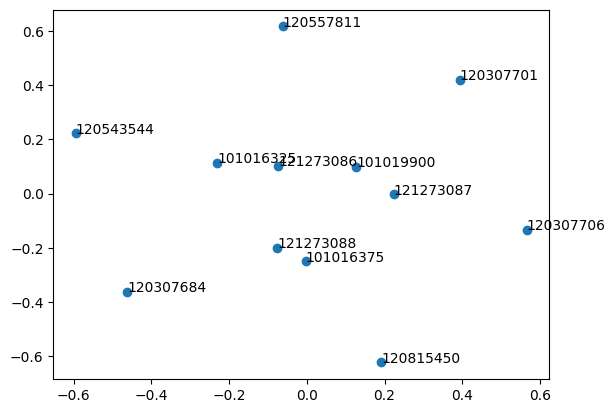

In [9]:
# MDS plot
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

matrix = np.nan_to_num(matrix, nan=1.0)

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X = mds.fit_transform(matrix)
plt.scatter(X[:, 0], X[:, 1])
for i, (x, y) in enumerate(X):
    plt.text(x, y, headers[i])
plt.show()

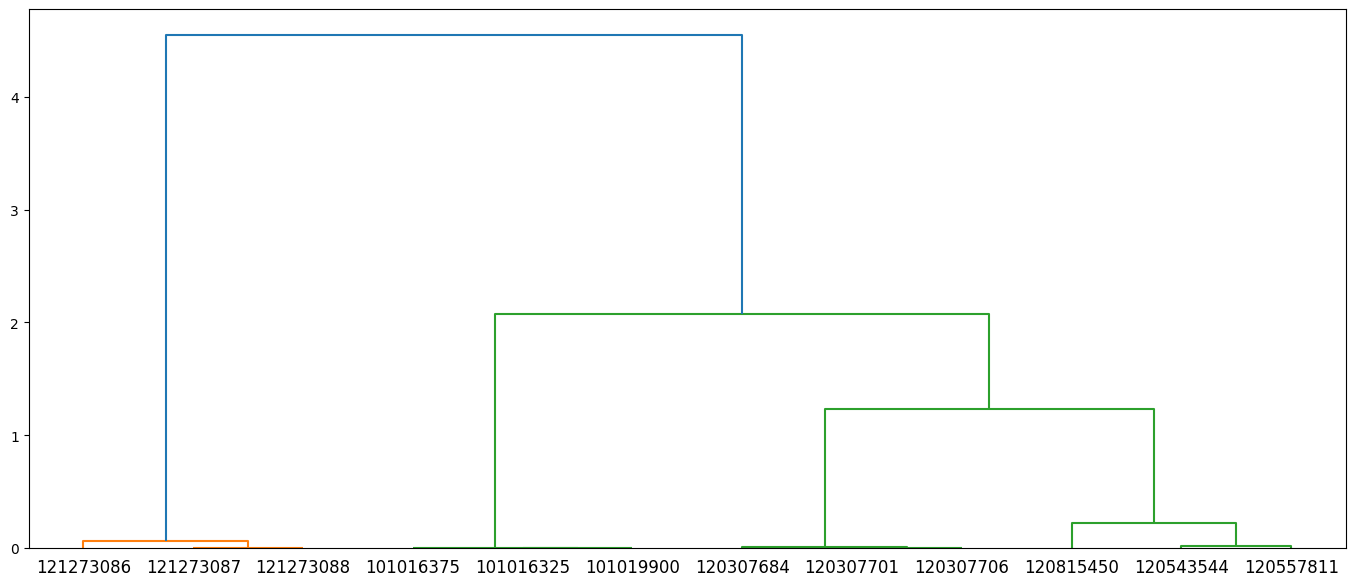

In [10]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(matrix, method='ward')
plt.figure(figsize=(17, 7))
dendrogram(Z, labels=headers)

plt.show()

## MDS vs hierarhiline klasterdamine

MDS graafikul on selgelt näha, et lähestiku on 101016325, 121273086, 101019900 ja 121273088, 101016375 ehk on sarnased. 

Dendrogramm näitab, et üldiselt on jaotatud ehr koodid kahte suuremasse klastrisse (oranž ja roheline), väga sarnased on nt 12127087, 12127088 ja kolmik 101016375, 101016325, 101019900 (seda MDS eriti hästi ei näita). 

Kui võrrelda 2 meetodit algse sarnasusmaatriksi andmetega, siis võib öelda, et dendrogramm näitab tulemusi täpsemalt. 

     id     main_cat                 sub_cat1                   sub_cat2
0    f1  piimatooted         piimad, keefirid                  rõõskpiim
1    f2  piimatooted         piimad, keefirid                   hapupiim
2    f3  piimatooted         piimad, keefirid            hapupiimatooted
3    f4  piimatooted         piimad, keefirid                     keefir
4    f5  piimatooted                 jogurtid                      kiles
5    f6  piimatooted                 jogurtid        maitsetama jogurtid
6    f7  piimatooted                 jogurtid                      pures
7    f8  piimatooted                 jogurtid              topsijogurtid
8    f9  piimatooted                  juustud          delikatessjuustud
9   f10  piimatooted                  juustud               feta juustud
10  f11  piimatooted                  juustud            hallitusjuustud
11  f12  piimatooted                  juustud              kõvad juustud
12  f13  piimatooted                  juustud      

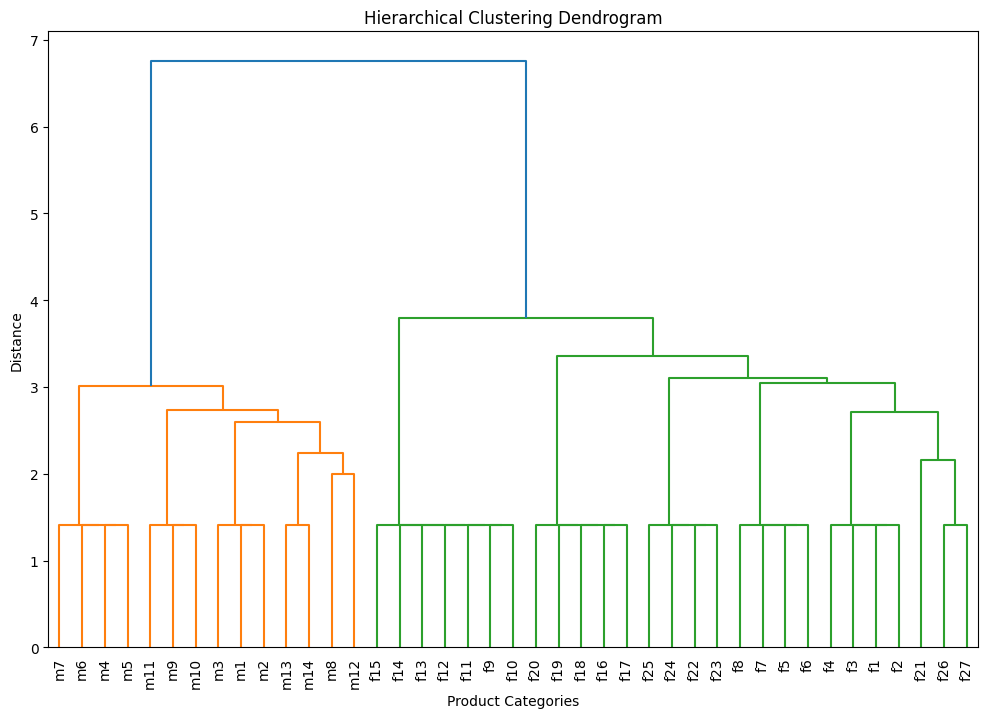

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Structured representation of the categories
data = [
    {"id": "f1", "main_cat": "piimatooted", "sub_cat1": "piimad, keefirid", "sub_cat2": "rõõskpiim"},
    {"id": "f2", "main_cat": "piimatooted", "sub_cat1": "piimad, keefirid", "sub_cat2": "hapupiim"},
    {"id": "f3", "main_cat": "piimatooted", "sub_cat1": "piimad, keefirid", "sub_cat2": "hapupiimatooted"},
    {"id": "f4", "main_cat": "piimatooted", "sub_cat1": "piimad, keefirid", "sub_cat2": "keefir"},
    {"id": "f5", "main_cat": "piimatooted", "sub_cat1": "jogurtid", "sub_cat2": "kiles"},
    {"id": "f6", "main_cat": "piimatooted", "sub_cat1": "jogurtid", "sub_cat2": "maitsetama jogurtid"},
    {"id": "f7", "main_cat": "piimatooted", "sub_cat1": "jogurtid", "sub_cat2": "pures"},
    {"id": "f8", "main_cat": "piimatooted", "sub_cat1": "jogurtid", "sub_cat2": "topsijogurtid"},
    {"id": "f9", "main_cat": "piimatooted", "sub_cat1": "juustud", "sub_cat2": "delikatessjuustud"},
    {"id": "f10", "main_cat": "piimatooted", "sub_cat1": "juustud", "sub_cat2": "feta juustud"},
    {"id": "f11", "main_cat": "piimatooted", "sub_cat1": "juustud", "sub_cat2": "hallitusjuustud"},
    {"id": "f12", "main_cat": "piimatooted", "sub_cat1": "juustud", "sub_cat2": "kõvad juustud"},
    {"id": "f13", "main_cat": "piimatooted", "sub_cat1": "juustud", "sub_cat2": "riivitud juustud"},
    {"id": "f14", "main_cat": "piimatooted", "sub_cat1": "juustud", "sub_cat2": "sulatatud juustud"},
    {"id": "f15", "main_cat": "piimatooted", "sub_cat1": "juustud", "sub_cat2": "toorjuustud"},
    {"id": "f16", "main_cat": "piimatooted", "sub_cat1": "kohupiimad, kodujuustud", "sub_cat2": "kodujuustud"},
    {"id": "f17", "main_cat": "piimatooted", "sub_cat1": "kohupiimad, kodujuustud", "sub_cat2": "kohukesed"},
    {"id": "f18", "main_cat": "piimatooted", "sub_cat1": "kohupiimad, kodujuustud", "sub_cat2": "kohupiimakreemid"},
    {"id": "f19", "main_cat": "piimatooted", "sub_cat1": "kohupiimad, kodujuustud", "sub_cat2": "kohupiimamass"},
    {"id": "f20", "main_cat": "piimatooted", "sub_cat1": "kohupiimad, kodujuustud", "sub_cat2": "kohupiimapastad"},
    {"id": "f21", "main_cat": "piimatooted", "sub_cat1": "kohvivalgendajad", "sub_cat2": "kondenspiimad"},
    {"id": "f22", "main_cat": "piimatooted", "sub_cat1": "koored, kreemid", "sub_cat2": "dipikastmed"},
    {"id": "f23", "main_cat": "piimatooted", "sub_cat1": "koored, kreemid", "sub_cat2": "hapukoor"},
    {"id": "f24", "main_cat": "piimatooted", "sub_cat1": "koored, kreemid", "sub_cat2": "rõõskkoor"},
    {"id": "f25", "main_cat": "piimatooted", "sub_cat1": "koored, kreemid", "sub_cat2": "toidukreemid"},
    {"id": "f26", "main_cat": "piimatooted", "sub_cat1": "munad", "sub_cat2": "none"},
    {"id": "f27", "main_cat": "piimatooted", "sub_cat1": "pudingud", "sub_cat2": "none"},
    
    {"id": "m1", "main_cat": "joogid", "sub_cat1": "joogipulbrid", "sub_cat2": "kaljapulber"},
    {"id": "m2", "main_cat": "joogid", "sub_cat1": "joogipulbrid", "sub_cat2": "lahustatud joogipulbrid"},
    {"id": "m3", "main_cat": "joogid", "sub_cat1": "joogipulbrid", "sub_cat2": "toniseeritud joogipulbrid"},
    {"id": "m4", "main_cat": "joogid", "sub_cat1": "karastusjoogid", "sub_cat2": "alkoholita siidrid"},
    {"id": "m5", "main_cat": "joogid", "sub_cat1": "karastusjoogid", "sub_cat2": "jääteed"},
    {"id": "m6", "main_cat": "joogid", "sub_cat1": "karastusjoogid", "sub_cat2": "kaljad"},
    {"id": "m7", "main_cat": "joogid", "sub_cat1": "karastusjoogid", "sub_cat2": "limonaadid"},
    {"id": "m8", "main_cat": "joogid", "sub_cat1": "kontsentraadid", "sub_cat2": "siirupid"},
    {"id": "m9", "main_cat": "joogid", "sub_cat1": "mahlad", "sub_cat2": "mahlajoogid"},
    {"id": "m10", "main_cat": "joogid", "sub_cat1": "mahlad", "sub_cat2": "nektarid"},
    {"id": "m11", "main_cat": "joogid", "sub_cat1": "mahlad", "sub_cat2": "täismahlad"},
    {"id": "m12", "main_cat": "joogid", "sub_cat1": "toonikud", "sub_cat2": "none"},
    {"id": "m13", "main_cat": "joogid", "sub_cat1": "veed", "sub_cat2": "gaseerimata"},
    {"id": "m14", "main_cat": "joogid", "sub_cat1": "veed", "sub_cat2": "gaseeritud"}
]

# Convert to DataFrame
df = pd.DataFrame(data)

# One-hot encode categorical variables to create feature matrix
encoder = OneHotEncoder(sparse_output=False)
categorical_cols = ['main_cat', 'sub_cat1', 'sub_cat2']
encoded_features = encoder.fit_transform(df[categorical_cols])

# Create feature matrix
X = encoded_features

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df['id'].values, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Product Categories')
plt.ylabel('Distance')
plt.axhline(y=200, color='r', linestyle='--')  # Draw a cutoff line
plt.show()